<a href="https://colab.research.google.com/github/PriscillaMuli/Actuarial-Heart-Attack-Analysis-Python-Project/blob/main/Actuarial_Heart_Attack_Analysis_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actuarial Heart Attack Analysis Python Project**

**1.1  Defining the Question**


The objective of this project is the prediction of probability of heart attack on a patient. This project is done using a dataset from Kaggle.com. The dataset is a collection of details for 303 categorized patients.

**1.2 Defining the Metric for Success**

Metric of success for this project is the effective prediction of probability of heart attack. The prediction must be accurate.

**1.3 Context Understanding**

Heart attack is the leading cause of death in the world thus building predictive models is a great advancement data science has brought to the field of healthcare.

**1.4 Recording the Experimental Design**

The following are the steps we are going to follow:

1. Data importation - loading the dataset with appropriate libraries to use

2. Data Cleaning - do the needed steps to clean the data

3. Exploratory Data Analysis - univariate and bivariate data analysis

4. Modelling - utilize selected models of choice for the handwritten digits recognition process

5. Evaluation and recommendations - comment on each tested model's suitability in solving the problem

6. Conclusion - final remarks on the project

**1.5 Data Relevance**

The data provided was found to be suitable for this data analysis considering the question given.

**1.6 Dataset Content**

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg: resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalachh: maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak: previous peak

slp: slope

caa: number of major vessels (0-3)

thal: thallium stress test result (0-3)

target: 0= less chance of heart attack 1= more chance of heart attack

#**2. Data Importation**

In [ ]:
# install pandas profiling
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 21.8 MB 141 kB/s
     |████████████████████████████████| 10.9 MB 6.1 MB/s 
     |████████████████████████████████| 596 kB 48.8 MB/s 
     |████████████████████████████████| 102 kB 44.5 MB/s 
     |████████████████████████████████| 690 kB 43.4 MB/s 
     |████████████████████████████████| 4.7 MB 23.5 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 41.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=bac99d02cf699372b0a15c32b7fa31af9864532794c7f03215f806103aa809b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-xgh36p47/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=628342ddae6346499449496e50a536645417a19de231197b8e1c0aa8b046200f
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

# 1.2 Reading the dataset and creating a dataframe for the dataset

In [ ]:
# Import libraries necessary for the analysis

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import sklearn as sk

import pandas_profiling as pp

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')  # don't print out warnings

## 1.2.1 Creating a dataframe from our dataset

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1.2.2 Previewing the dataset

  Importing the Dataset

In [ ]:
# Viewing the first 5 entries in the dataset

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Viewing the last 5 entries in the dataset

df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# Checking if each column has an appropriate datatype
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
df['age'] = df['age'].astype(float)

In [ ]:
df.dtypes

age          float64
sex            int64
cp             int64
trtbps         int64
chol           int64
fbs            int64
restecg        int64
thalachh       int64
exng           int64
oldpeak      float64
slp            int64
caa            int64
thall          int64
output         int64
age group     object
dtype: object

In [ ]:
# Checking information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 178 to 151
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3   trtbps     303 non-null    int64  
 4   chol       303 non-null    int64  
 5   fbs        303 non-null    int64  
 6   restecg    303 non-null    int64  
 7   thalachh   303 non-null    int64  
 8   exng       303 non-null    int64  
 9   oldpeak    303 non-null    float64
 10  slp        303 non-null    int64  
 11  caa        303 non-null    int64  
 12  thall      303 non-null    int64  
 13  output     303 non-null    int64  
 14  age group  303 non-null    object 
dtypes: float64(2), int64(12), object(1)
memory usage: 46.0+ KB


In [ ]:
report = pp.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Determine the number of records in the dataset
print('This dataset has ' + str(df.shape[0]) + ' rows and ' +  str(df.shape[1]) + ' columns' )

This dataset has 303 rows and 14 columns


In [ ]:
# Checking the columns

df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## 1.2.3 Missing values

In [ ]:
# Checking for missing values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Text(0.5, 1.0, 'Null Values in Data Frame')

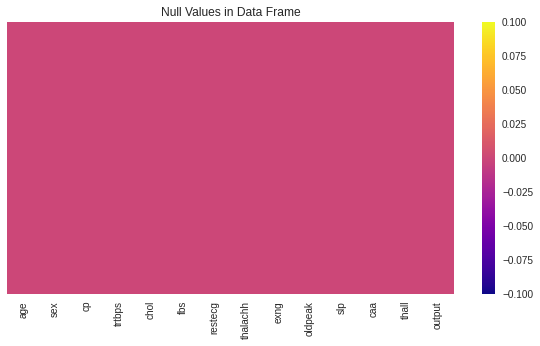

In [ ]:
#plot the missing values on a heatmap

plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'plasma')
plt.title('Null Values in Data Frame')

In [ ]:
# get the number of missing data points per column

missing_value_count = (df.isnull().sum())
print(missing_value_count[missing_value_count > 0])
# percent of data that is missing
total_cells = np.product(df.shape)
total_missing_value = missing_value_count.sum()
print('Percentage of missing value in Data Frame is:', total_missing_value / total_cells*100)
print('Total number of our cells is:', total_cells)
print('Total number of our missing value is:', total_missing_value)

Series([], dtype: int64)
Percentage of missing value in Data Frame is: 0.0
Total number of our cells is: 4242
Total number of our missing value is: 0


## 1.3.1 Outliers

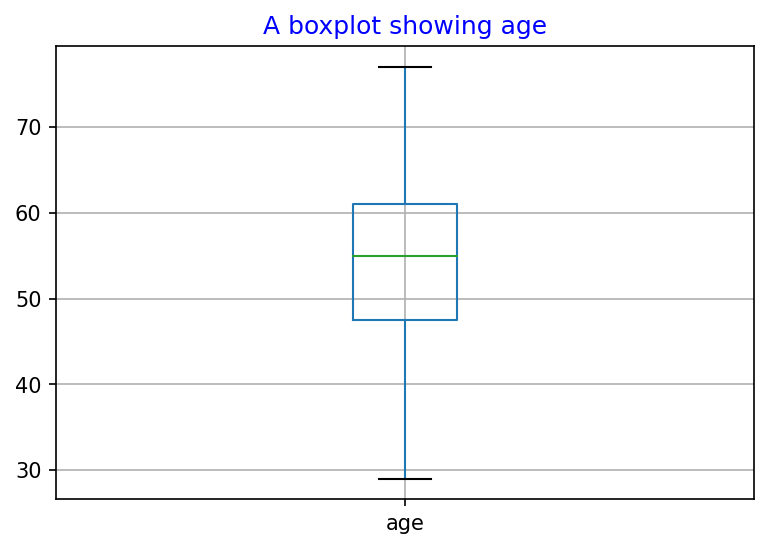

In [ ]:
# Check for outliers on the variable (Household_size) using a boxplot
# This boxplot is created using pandas
# Give a title to the chart and display the chart
plt.figure(dpi = 150)
df.boxplot(['age'])
plt.title("A boxplot showing age", color = 'blue')
plt.show()


# the boxplot shows that there are no outliers

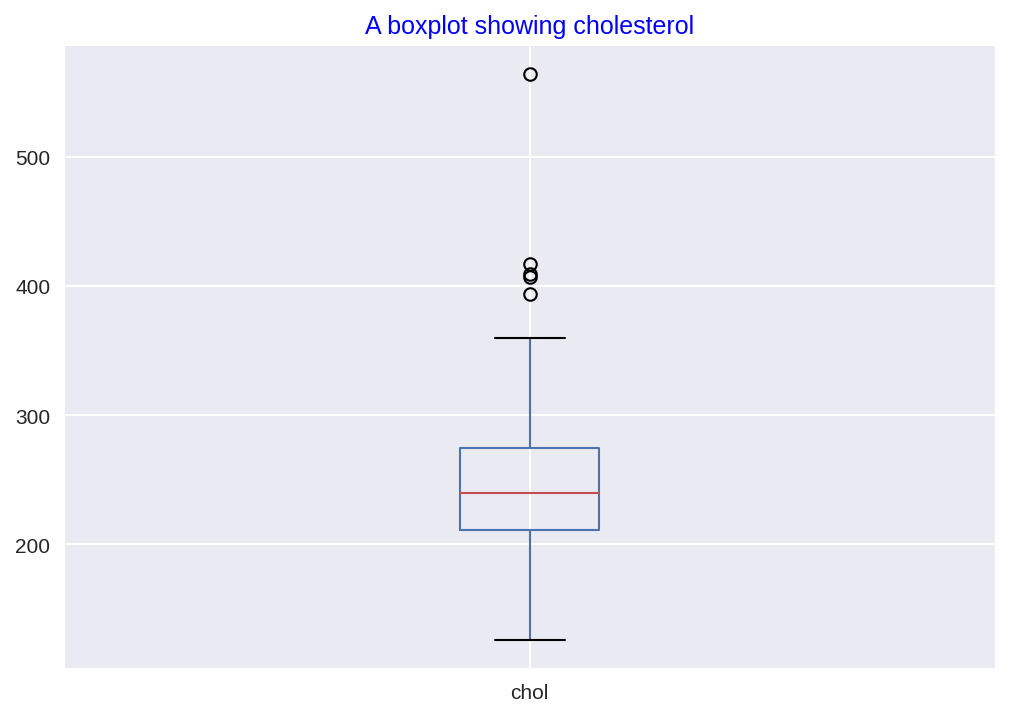

In [ ]:
# Check for outliers on the variable (Number of people living in one house) using a boxplot
# This boxplot is created using pandas
# Give a title to the chart and display the chart
plt.figure(dpi = 150)
df.boxplot(['chol'])
plt.title("A boxplot showing cholesterol", color = 'blue')
plt.show()


# the boxplot shows that there are outliers

##1.3.2 Anomalies

In [ ]:
# checking whether there are anomalies 
df.nunique().sort_values()

sex           2
fbs           2
exng          2
output        2
restecg       3
slp           3
cp            4
thall         4
caa           5
oldpeak      40
age          41
trtbps       49
thalachh     91
chol        152
dtype: int64

# 1.4 Exploratory Data Analysis
### 1.4.1 Visualization

In [ ]:
## cohort analysis of age with output
def age_cohort(age):
    if age <= 45:
        return "0-45"
    elif age > 45 and age <= 55:
        return "45-55"
    elif age > 55 and age <= 60:
        return "55-60"
    elif age > 60:
        return "60+"
    
df['age group'] = df['age'].apply(age_cohort)
df.sort_values('age group', inplace = True)



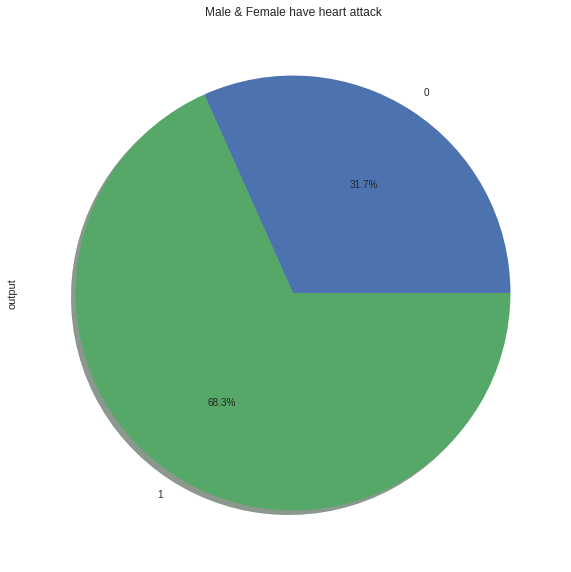

In [ ]:
# make groupby and pie graph to see how the percentage [ male and female] have heart attack

df.groupby('sex')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Male & Female have heart attack")

Gender of the patients
1 = 68.3% are male,

0 = 31.7% are female

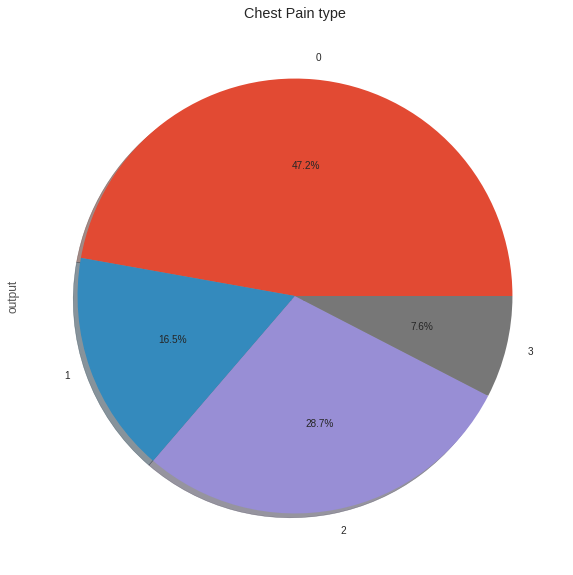

In [ ]:
# make groupby and pie graph to see how the percentage [ Chest Pain type chest pain type]

df.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Chest Pain type")

cp : Chest Pain type chest pain type

0 : asymptomatic 47.2%

1 : typical angina 16.5%

2 : atypical angina 28.7 %

3 : non-anginal pain 7.6 %

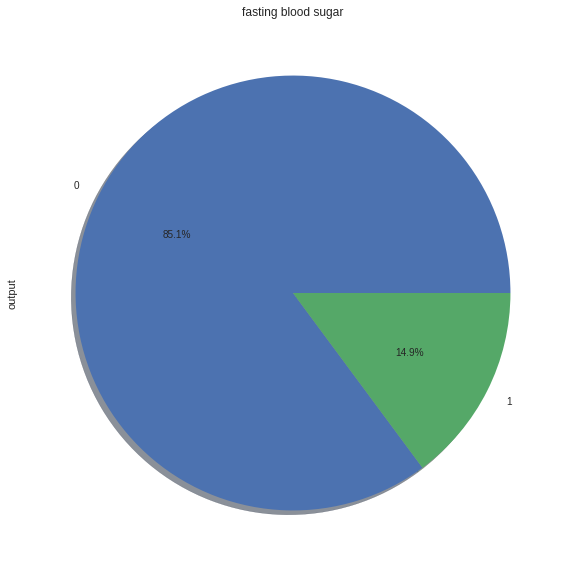

In [ ]:
# make groupby and pie graph to see how the percentage [ fasting blood sugar]


df.groupby('fbs')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

0 = 85.1 %

1 = 14.9 %

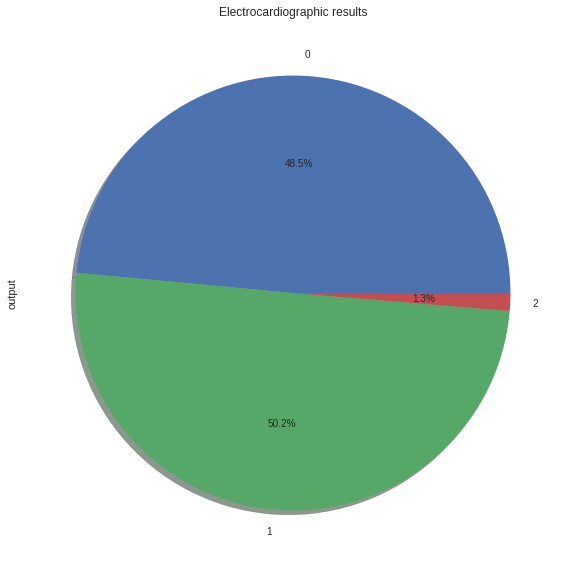

In [ ]:
# make groupby and pie graph to see how the percentage [ Electrocardiographic results]


df.groupby('restecg')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(10,10),title="Electrocardiographic results")

rest_ecg : resting electrocardiographic results

Value 0: normal = 48.5%

Value 1: having ST-T wave abnormality (T wave inversions and/

or ST elevation or depression of > 0.05 mV) = 50.2 %

Value 2: showing probable or definite left ventricular 

hypertrophy by Estes' criteria = 1.3 %

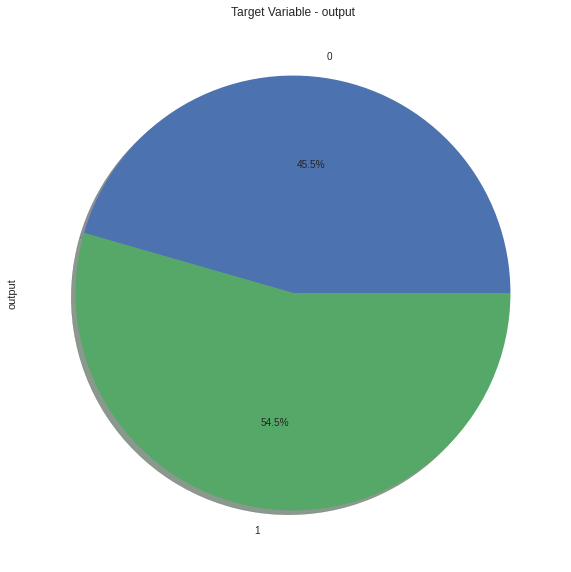

In [ ]:
# make groupby and pie graph to see how the percentage [ Target Variable - output]


df.groupby('output')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Target Variable - output")

Target Variable - output

More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent are not at risk.

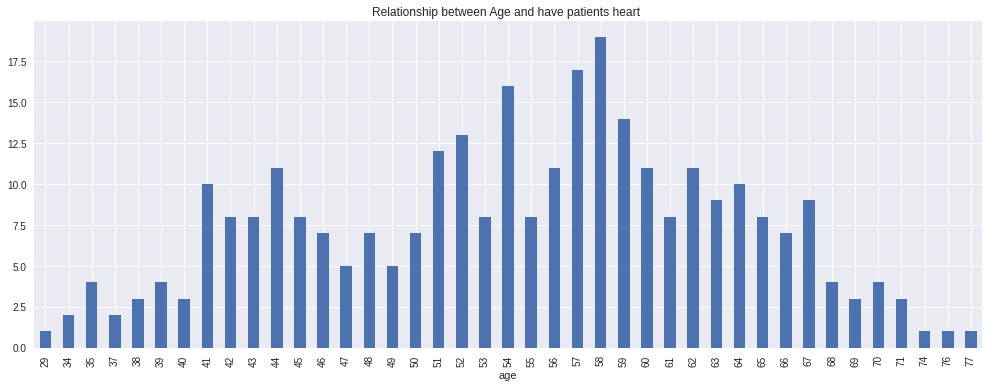

In [ ]:
# make groupby and bar graph to see relationship between Age and have patients heart 


df.groupby('age')["output"].count().plot(kind="bar",figsize=(17,6), title="Relationship between Age and have patients heart ")

##BIVARIATE
## SCATTER PLOT

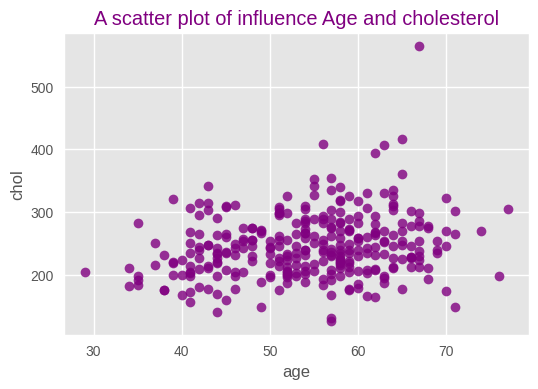

In [ ]:
# Using Seaborn: 
# Specifying the dots per inch
# Using the function regplot from Seaborn to create our scatterplot
# creating a title for our scatter plot
# displaying the scatter plot
plt.figure(dpi = 100)
sns.regplot(x= df['age'], y= df['chol'], fit_reg = False, color = 'purple')
plt.title("A scatter plot of influence Age and cholesterol", color = 'purple')
plt.show()

0 = less chance of heart attack

1 = more chance of heart attack maybe when increasing old years have more chance of heart attack

##RESULTS OF THE EXPLORATORY DATA ANALYSIS

**Exploratory Data Anlaysis Results**

**Age Variable**

The vast majority of patients are between 50 and 60.

Maybe when years increase, a patient has a higher chance of heart attack

**Patients' Gender**

68.3% are Male,

31.7% are Female

**Chest Pain type**

Asymptomatic 47.2%

Typical angina 16.5%

Atypical angina 28.7 %

Non-anginal pain 7.6 %

**Fasting Blood Sugar**

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
0 = 85.1 %

0 = 85.1 %

1 = 14.9 %

**Resting electrocardiographic results**

Normal = 48.5%

Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) = 50.2 %

Showing probable or definite left ventricular hypertrophy by Estes' criteria = 1.3 %

Target Variable - output

More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent are not at risk

##CORRELATION

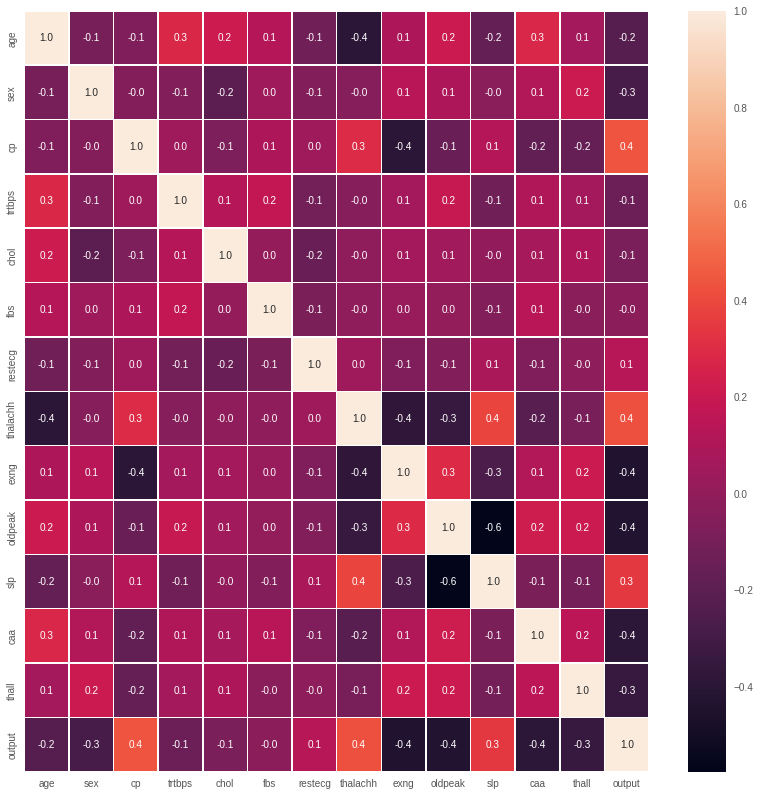

In [ ]:
f, ax = plt.subplots(figsize = (14,14))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = .5,
            fmt = '.1f',
            ax = ax)

In [ ]:
df.corr()['output'].sort_values(ascending = False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [ ]:
# Counting distinct values in each column
for i in list(df.columns):
    print("{} - {}".format(i, df[i].value_counts().shape[0]))

age - 41
sex - 2
cp - 4
trtbps - 49
chol - 152
fbs - 2
restecg - 3
thalachh - 91
exng - 2
oldpeak - 40
slp - 3
caa - 5
thall - 4
output - 2
age group - 4


In [ ]:
cat_cols = ['sex','cp','fbs','restecg','exang','slp','caa','thall','risk']
con_cols = ['age','rsbp','chol','maxhr','oldpeak']

In [ ]:
print("categorical columns are:", cat_cols)
print("continuous columns are:", con_cols)

categorical columns are: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slp', 'caa', 'thall', 'risk']
continuous columns are: ['age', 'rsbp', 'chol', 'maxhr', 'oldpeak']


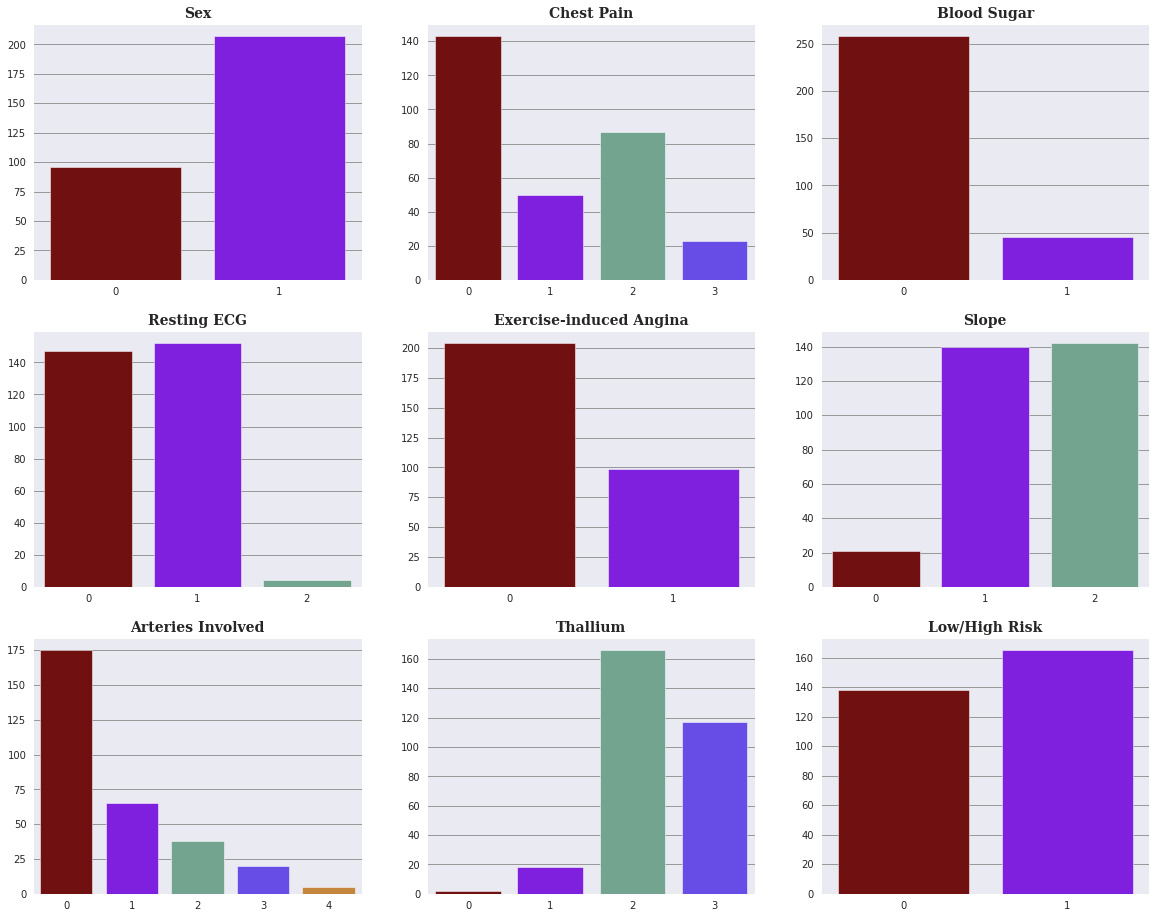

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20, 16))
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": "-"})

# Sex
sns.countplot(ax=axs[0,0], data=df, x='sex', palette=color_palette)
axs[0,0].set_title('Sex', fontsize=14, fontweight='bold', fontfamily='serif')
axs[0,0].set_xlabel("")
axs[0,0].set_ylabel("");
# Chest Pain
sns.countplot(ax=axs[0,1], data=df, x='cp',palette=color_palette)
axs[0,1].set_title('Chest Pain', fontsize=14, fontweight='bold', fontfamily='serif')
axs[0,1].set_xlabel("")
axs[0,1].set_ylabel("");

# Fasting Blood Sugar
sns.countplot(ax=axs[0,2], data=df, x='fbs',palette=color_palette)
axs[0,2].set_title('Blood Sugar', fontsize=14, fontweight='bold', fontfamily='serif')
axs[0,2].set_xlabel("")
axs[0,2].set_ylabel("");

# Resting ECG
sns.countplot(ax=axs[1,0], data=df, x='restecg',palette=color_palette)
axs[1,0].set_title('Resting ECG', fontsize=14, fontweight='bold', fontfamily='serif')
axs[1,0].set_xlabel("")
axs[1,0].set_ylabel("");

# Angina
sns.countplot(ax=axs[1,1], data=df, x='exng',palette=color_palette)
axs[1,1].set_title('Exercise-induced Angina', fontsize=14, fontweight='bold', fontfamily='serif')
axs[1,1].set_xlabel("")
axs[1,1].set_ylabel("");

# Slope
sns.countplot(ax=axs[1,2], data=df, x='slp',palette=color_palette)
axs[1,2].set_title('Slope', fontsize=14, fontweight='bold', fontfamily='serif')
axs[1,2].set_xlabel("")
axs[1,2].set_ylabel("");
# Number of Vessels
sns.countplot(ax=axs[2,0], data=df, x='caa',palette=color_palette)
axs[2,0].set_title('Arteries Involved', fontsize=14, fontweight='bold', fontfamily='serif')
axs[2,0].set_xlabel("")
axs[2,0].set_ylabel("");

# Thallium Score
sns.countplot(ax=axs[2,1], data=df, x='thall',palette=color_palette)
axs[2,1].set_title('Thallium', fontsize=14, fontweight='bold', fontfamily='serif')
axs[2,1].set_xlabel("")
axs[2,1].set_ylabel("");

# Low vs High Risk
sns.countplot(ax=axs[2,2], data=df, x='output',palette=color_palette)
axs[2,2].set_title('Low/High Risk', fontsize=14, fontweight='bold', fontfamily='serif')
axs[2,2].set_xlabel("")
axs[2,2].set_ylabel("");

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
178,43.0,1,0,120,177,0,0,120,1,2.5,1,0,3,0
116,41.0,1,2,130,214,0,0,168,0,2.0,1,0,2,1
74,43.0,0,2,122,213,0,1,165,0,0.2,1,0,2,1
200,44.0,1,0,110,197,0,0,177,0,0.0,2,1,2,0
72,29.0,1,1,130,204,0,0,202,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,67.0,0,2,152,277,0,1,172,0,0.0,2,1,2,1
137,62.0,1,1,128,208,1,0,140,0,0.0,2,0,2,1
238,77.0,1,0,125,304,0,0,162,1,0.0,2,3,2,0
38,65.0,0,2,155,269,0,1,148,0,0.8,2,0,2,1


In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age group
178,43.0,1,0,120,177,0,0,120,1,2.5,1,0,3,0,0-45
116,41.0,1,2,130,214,0,0,168,0,2.0,1,0,2,1,0-45
74,43.0,0,2,122,213,0,1,165,0,0.2,1,0,2,1,0-45
200,44.0,1,0,110,197,0,0,177,0,0.0,2,1,2,0,0-45
72,29.0,1,1,130,204,0,0,202,0,0.0,2,0,2,1,0-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,67.0,0,2,152,277,0,1,172,0,0.0,2,1,2,1,60+
137,62.0,1,1,128,208,1,0,140,0,0.0,2,0,2,1,60+
238,77.0,1,0,125,304,0,0,162,1,0.0,2,3,2,0,60+
38,65.0,0,2,155,269,0,1,148,0,0.8,2,0,2,1,60+


In [ ]:
X = df.drop(columns = ['output'])
y = df['output']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .2,
                                                    random_state = 777)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Testing-set Accuracy score is: 0.8524590163934426
Training-set Accuracy score is: 1.0


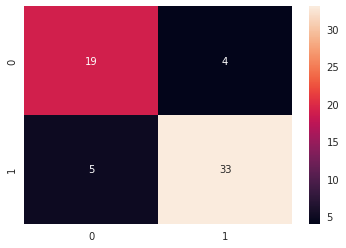

In [ ]:
clf_rf = RandomForestClassifier(random_state=777)
clf_rf = clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,clf_rf.predict(X_train)))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = "d")

AdaBoost Classifier Model Accuracy is: 0.8360655737704918


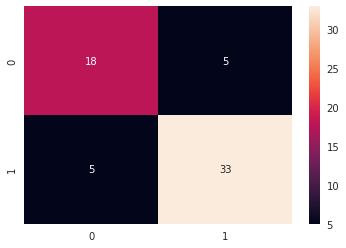

In [ ]:
abc = AdaBoostClassifier(n_estimators = 50,
                         learning_rate = 1, 
                         random_state = 777)
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)
acc = accuracy_score(y_test, y_pred_abc)
print('AdaBoost Classifier Model Accuracy is:',acc)
cm = confusion_matrix(y_test, y_pred_abc)
sns.heatmap(cm, annot = True, fmt="d")

Gradient Boosting Classifier Model Accuracy score is: 0.8524590163934426


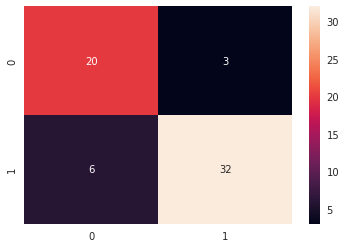

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
acc = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Classifier Model Accuracy score is:", acc)
cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot = True, fmt="d")

KNN Model Acuuracy is: 0.8852459016393442


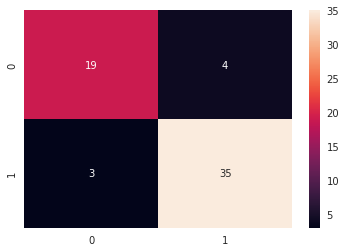

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc = knn.score(X_test, y_test)
print("KNN Model Acuuracy is:", acc)
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot = True, fmt="d")

SVC Accuracy score is: 0.9016393442622951


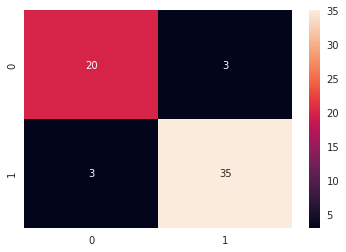

In [ ]:
svc = SVC(random_state = 777)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc = svc.score(X_test, y_test)
print("SVC Accuracy score is:", acc)
cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
acc = lr.score(X_test, y_test)
print("LogisticRegression accuracy score is:",acc)
report = classification_report(y_test, lr_pred)
print(report)

LogisticRegression accuracy score is: 0.9016393442622951
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.92      0.92      0.92        38

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Decision Tree accuracy score is : 0.8360655737704918


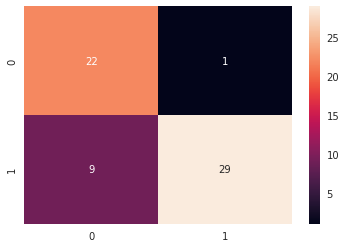

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
acc = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy score is :",acc)
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot = True, fmt = "d")

 90% accuracy is achieved with Support Vector Machines model thus it is the preferred choice of model